In [290]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [291]:
# Define the grid environment
class RoboGridEnv:
    def __init__(self, grid_size, start, goal, obstacles):
        self.grid_size = grid_size
        self.start = start
        self.goal = goal
        self.obstacles = obstacles
        self.actions = ['up', 'down', 'left', 'right']
        self.state = start

    def reset(self):
        """Reset the environment to the initial state."""
        self.state = self.start
        return self.state

    def step(self, action):
        """Take an action and return the new state, reward, and done flag."""
        x, y = self.state

        if action == 'up':
            x = max(0, x - 1)
        elif action == 'down':
            x = min(self.grid_size[0] - 1, x + 1)
        elif action == 'left':
            y = max(0, y - 1)
        elif action == 'right':
            y = min(self.grid_size[1] - 1, y + 1)

        new_state = (x, y)

        # Determine the reward and if it's done
        if new_state == self.goal:
            reward = 100
            done = True
        elif new_state in self.obstacles:
            reward = -50
            done = False
        else:
            reward = -1  # Small penalty for each move
            done = False

        self.state = new_state
        return new_state, reward, done

    def get_possible_actions(self):
        """Return all possible actions."""
        return self.actions


In [292]:
# Q-learning parameters
alpha = 0.1    # Learning rate
gamma = 0.99   # Discount factor
epsilon = 0.1  # Exploration rate


In [293]:
# Initialize Q-table
def initialize_q_table(grid_size, actions):
    """Initialize the Q-table."""
    return np.zeros(grid_size + (len(actions),))

# Choose action using epsilon-greedy strategy
def choose_action(state, q_table, epsilon, actions):
    """Epsilon-greedy action selection."""
    if random.uniform(0, 1) < epsilon:
        # Explore: choose a random action
        return random.choice(actions)
    else:
        # Exploit: choose the action with the highest Q-value
        state_action_values = q_table[state[0], state[1], :]
        return actions[np.argmax(state_action_values)]


In [294]:
def plot_q_table_with_arrows(q_table, env):
    """Plot the Q-table with arrows indicating the max Q-value action for each state."""
    fig, ax = plt.subplots()

    # Create a grid to show the arrows
    grid_size = env.grid_size
    ax.set_xticks(np.arange(grid_size[1]))
    ax.set_yticks(np.arange(grid_size[0]))
    ax.grid(True, which='both', color='black', linestyle='-', linewidth=1)
    ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

    # Define arrow directions for actions (up, down, left, right)
    action_arrows = {
        0: (0, 1),   # Up
        1: (0, -1),  # Down
        2: (-1, 0),  # Left
        3: (1, 0)    # Right
    }

    # Iterate through the Q-table to plot arrows
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            # Get the action with the maximum Q-value for this state
            max_action = np.argmax(q_table[i, j, :])
            dx, dy = action_arrows[max_action]
            
            # Plot the arrow in the corresponding grid cell
            if (i, j) not in obstacles and (i, j) != goal:
                ax.arrow(j + 0.5, grid_size[0] - i - 0.5, dx*0.3, dy*0.3, 
                     head_width=0.2, head_length=0.2, fc='blue', ec='blue')

    # Set the plot limits and aspect ratio
    ax.set_xlim([0, grid_size[1]])
    ax.set_ylim([0, grid_size[0]])
    ax.set_aspect('equal')

    plt.title('Q-Table Policy Visualization with Arrows')
    plt.show()

In [295]:
# Q-learning algorithm
def q_learning(env, episodes, alpha, gamma, epsilon):
    """Q-learning algorithm for the robo-grid environment."""
    q_table = initialize_q_table(env.grid_size, env.actions)
    rewards_per_episode = []
    q_values_per_episode = []

    for episode in range(episodes):
        state = env.reset()
        total_rewards = 0
        done = False

        while not done:
            action = choose_action(state, q_table, epsilon, env.actions)
            next_state, reward, done = env.step(action)
            
            # Update Q-value using the Q-learning update rule
            action_index = env.actions.index(action)
            next_max = np.max(q_table[next_state[0], next_state[1], :])
            q_table[state[0], state[1], action_index] = q_table[state[0], state[1], action_index] + alpha * (
                reward + gamma * next_max - q_table[state[0], state[1], action_index]
            )

            state = next_state
            total_rewards += reward

        # Store rewards and Q-values after each episode
        rewards_per_episode.append(total_rewards)

    # Compute average Q-value for this episode and store it
        avg_q_value = np.mean(q_table)
        q_values_per_episode.append(avg_q_value)

    # Plot Q-value convergence
    #plot_q_value_convergence(episode, q_values_per_episode)

    return q_table, rewards_per_episode


In [296]:
# Environment setup
grid_size = (10, 10)
start = (0, 0)
goal = (9, 9)
obstacles = [(1, 1), (1, 2), (1, 3), (6,6), (6,7), (6,8)]
env = RoboGridEnv(grid_size, start, goal, obstacles)


In [297]:
# Train the robot using Q-learning
episodes = 350
q_table, rewards_per_episode = q_learning(env, episodes, alpha, gamma, epsilon)


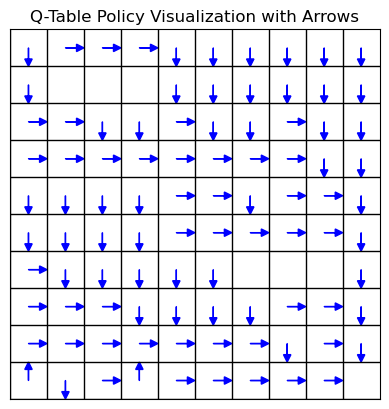

In [298]:
# Assuming you have trained the model and obtained the q_table
plot_q_table_with_arrows(q_table, env)


In [299]:
# Output the learned Q-table and the total rewards per episode
print("Learned Q-table:")
print(q_table)
print("\nRewards per episode:")
print(rewards_per_episode)


Learned Q-table:
[[[ 1.19185012e+00  5.39436164e+01 -7.92630013e+00 -7.82908299e+00]
  [-7.12247763e+00 -2.36699738e+01 -7.13650963e+00 -7.11118931e+00]
  [-6.36434111e+00 -2.65331833e+01 -6.45046159e+00 -6.13077697e+00]
  [-5.52092005e+00 -1.36137206e+01 -5.63551820e+00 -4.22339294e+00]
  [-4.76036457e+00  9.42337520e-01 -4.82706535e+00 -4.64912280e+00]
  [-4.00067651e+00 -3.37584622e+00 -4.00167075e+00 -3.95155594e+00]
  [-3.41825315e+00 -3.21439745e+00 -3.35028910e+00 -3.34374933e+00]
  [-2.83904123e+00 -2.76261220e+00 -2.90147676e+00 -2.79392668e+00]
  [-2.34783983e+00 -1.82820011e+00 -2.34929008e+00 -2.33481229e+00]
  [-2.15927826e+00 -2.14993331e+00 -2.15986377e+00 -2.17705327e+00]]

 [[-4.95766924e+00  6.08442785e+01 -6.43421884e-01 -3.82798229e+01]
  [-3.07654973e+00  1.40060109e+01 -3.18234982e+00 -5.00000000e+00]
  [-2.31747205e+00  4.79804603e+00 -9.58779163e+00 -5.00000000e+00]
  [-8.73964793e-01 -7.81011905e-01 -5.00000000e+00 -5.12603898e-01]
  [-3.85514491e+00  1.0451607

In [300]:

# Test the learned policy
def test_policy(env, q_table):
    """Test the learned policy by navigating the grid."""
    state = env.reset()
    done = False
    steps = 0

    while not done:
        action = choose_action(state, q_table, epsilon=0.0, actions=env.actions)  # Greedy policy (epsilon = 0)
        next_state, reward, done = env.step(action)
        print(f"State: {state}, Action: {action}, Next State: {next_state}, Reward: {reward}")
        state = next_state
        steps += 1
        if done:
            print(f"Reached goal in {steps} steps!")



In [301]:
# Test the learned policy on the robo-grid
print("\nTesting the learned policy:")
test_policy(env, q_table)



Testing the learned policy:
State: (0, 0), Action: down, Next State: (1, 0), Reward: -1
State: (1, 0), Action: down, Next State: (2, 0), Reward: -1
State: (2, 0), Action: right, Next State: (2, 1), Reward: -1
State: (2, 1), Action: right, Next State: (2, 2), Reward: -1
State: (2, 2), Action: down, Next State: (3, 2), Reward: -1
State: (3, 2), Action: right, Next State: (3, 3), Reward: -1
State: (3, 3), Action: right, Next State: (3, 4), Reward: -1
State: (3, 4), Action: right, Next State: (3, 5), Reward: -1
State: (3, 5), Action: right, Next State: (3, 6), Reward: -1
State: (3, 6), Action: right, Next State: (3, 7), Reward: -1
State: (3, 7), Action: right, Next State: (3, 8), Reward: -1
State: (3, 8), Action: down, Next State: (4, 8), Reward: -1
State: (4, 8), Action: right, Next State: (4, 9), Reward: -1
State: (4, 9), Action: down, Next State: (5, 9), Reward: -1
State: (5, 9), Action: down, Next State: (6, 9), Reward: -1
State: (6, 9), Action: down, Next State: (7, 9), Reward: -1
St